<a href="https://colab.research.google.com/github/khagesh-bonde/C/blob/main/RealEstate_Wine_Industry_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Boston-house-price-data.csv to Boston-house-price-data.csv


In [10]:
import pandas as pd

boston = pd.read_csv("Boston-house-price-data.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
print("Shape:", boston.shape)
print("\nColumns:")
print(boston.columns)

print("\nDataset Info:")
boston.info()

Shape: (506, 14)

Columns:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [36]:
boston.columns = boston.columns.str.strip().str.lower()

skewness = boston.skew(numeric_only=True)
print("Feature Skewness:")
print(skewness.sort_values(ascending=False))

Feature Skewness:
crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
b         -2.890374
dtype: float64


In [37]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

outliers = ((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))).sum()
print("Outliers per Column:")
print(outliers)

Outliers per Column:
crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64


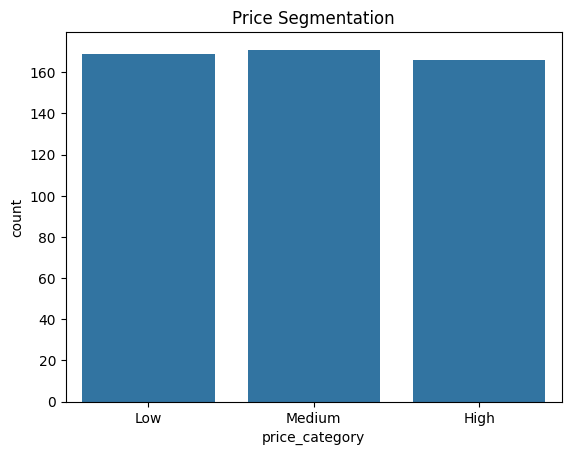

In [39]:
boston['price_category'] = pd.qcut(boston['medv'], 3, labels=["Low", "Medium", "High"])

sns.countplot(x='price_category', data=boston)
plt.title("Price Segmentation")
plt.show()

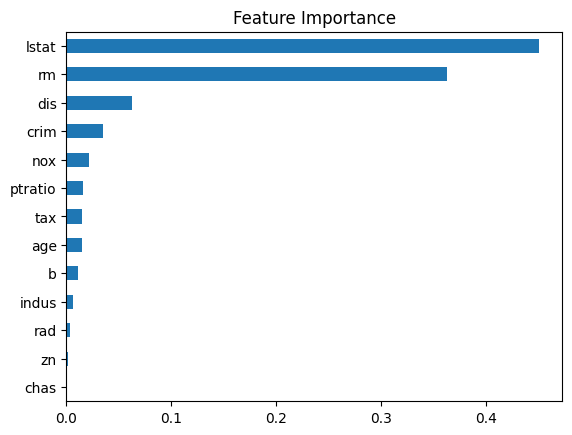

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Features
X = boston.drop(['medv','price_category'], axis=1)

# Target
y = boston['medv']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [44]:
print(boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'price_category'],
      dtype='object')


In [17]:
target = "MEDV"

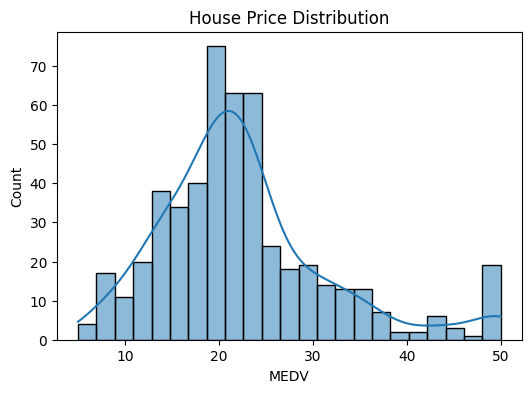

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(boston[target], kde=True)
plt.title("House Price Distribution")
plt.show()

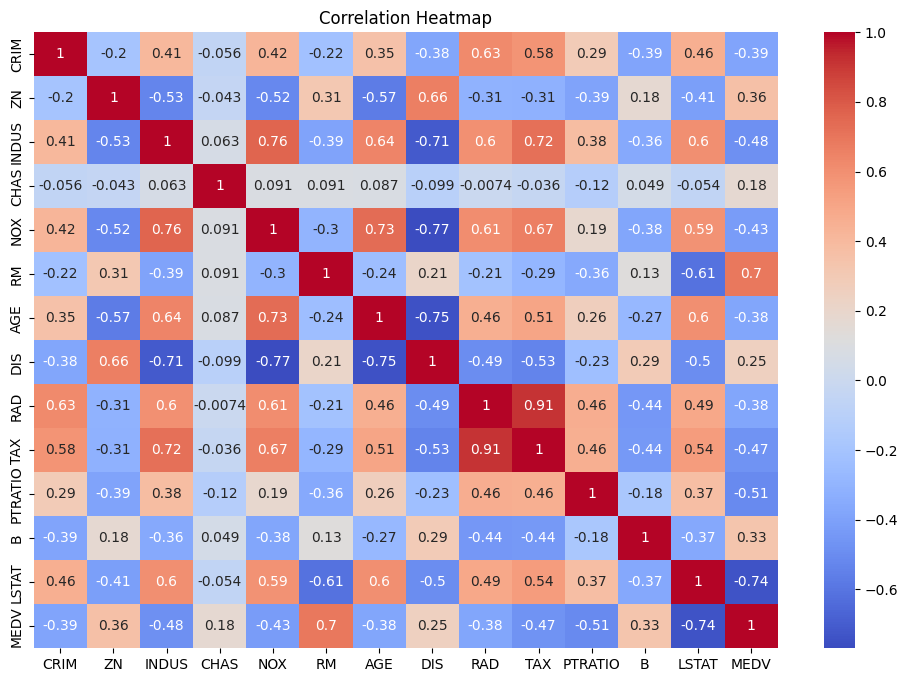

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(boston.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

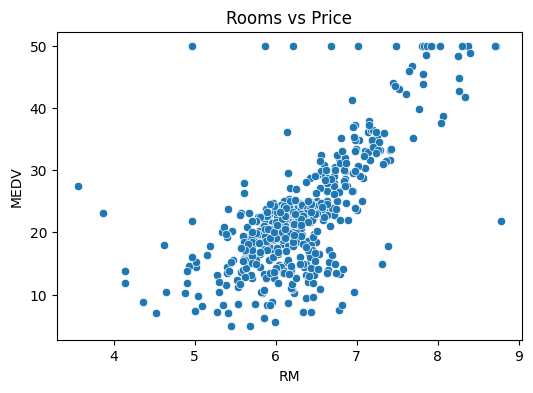

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='RM', y='MEDV', data=boston)
plt.title("Rooms vs Price")
plt.show()

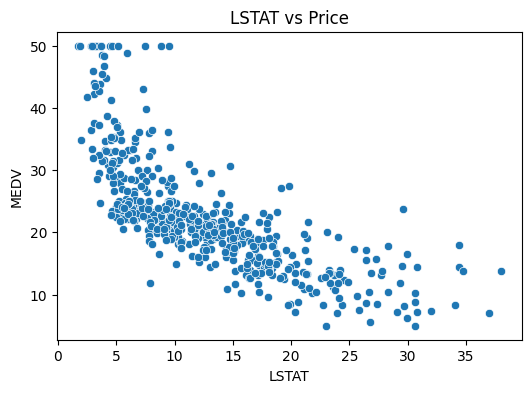

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='LSTAT', y='MEDV', data=boston)
plt.title("LSTAT vs Price")
plt.show()

In [26]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [27]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
print("Shape:", wine.shape)
wine.info()
wine.describe()

Shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


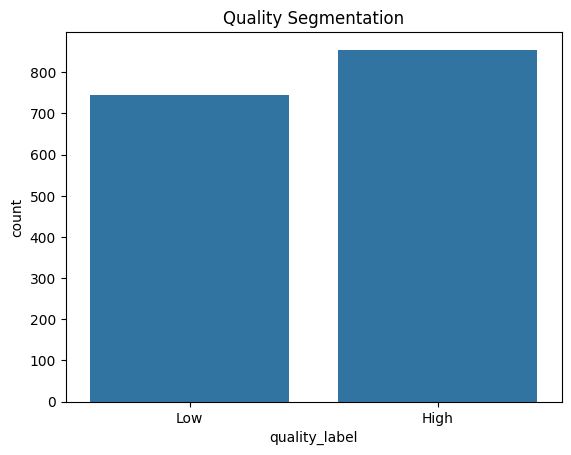

In [46]:
wine['quality_label'] = wine['quality'].apply(lambda x: "Low" if x <= 5 else "High")

sns.countplot(x='quality_label', data=wine)
plt.title("Quality Segmentation")
plt.show()

In [47]:
corr = wine.corr(numeric_only=True)['quality'].sort_values(ascending=False)
print("Correlation with Quality:")
print(corr)

Correlation with Quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


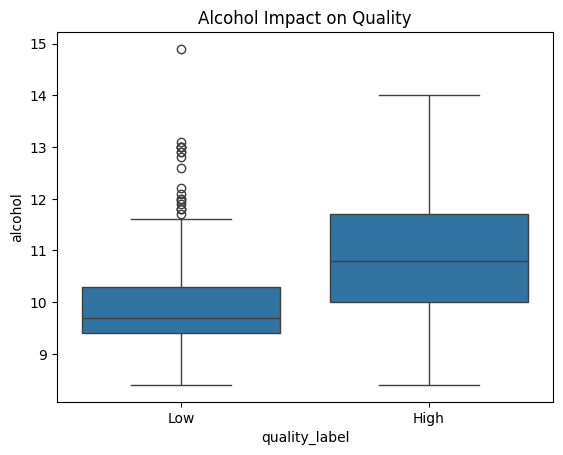

In [48]:
sns.boxplot(x='quality_label', y='alcohol', data=wine)
plt.title("Alcohol Impact on Quality")
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wine.drop(['quality','quality_label'], axis=1)
y = wine['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.79375


In [31]:
target = "quality"

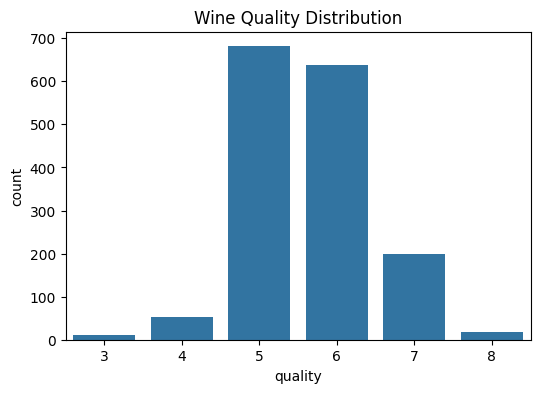

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x=wine[target])
plt.title("Wine Quality Distribution")
plt.show()

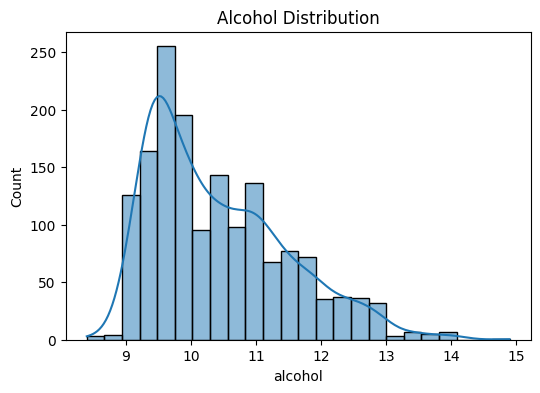

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(wine['alcohol'], kde=True)
plt.title("Alcohol Distribution")
plt.show()

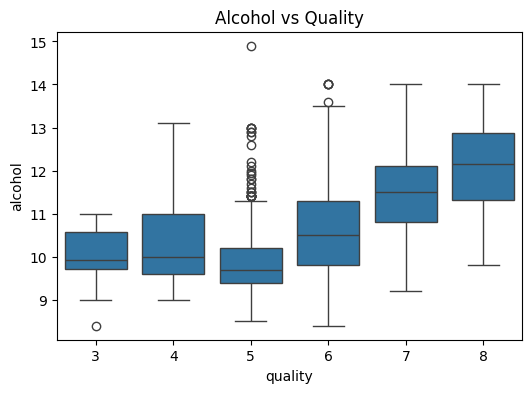

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title("Alcohol vs Quality")
plt.show()

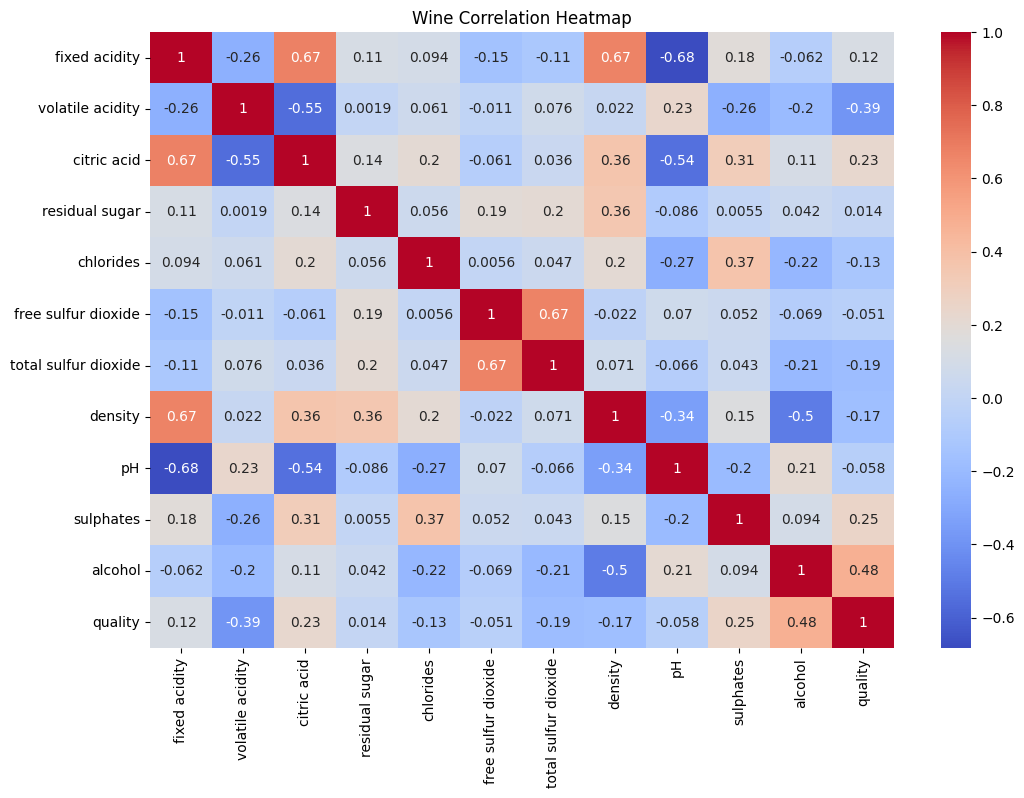

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(), annot=True, cmap="coolwarm")
plt.title("Wine Correlation Heatmap")
plt.show()